In [1]:
# 기울기
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]  # f(x+h) 계산

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h   # f(x-h) 계산
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 값 복원
        
        return grad

In [6]:
# 기울기는 각 지점에서 낮아지는 방향
# 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향

import numpy as np

def function_2(x):
    return x[0] ** 2 + x[1] ** 2  # or return np.sum(x**2)


print(numerical_gradient(function_2, np.array([3.0, 4.0])))  # [ 6.  8.]
print(numerical_gradient(function_2, np.array([0.0, 2.0])))  # [ 0.  4.]
print(numerical_gradient(function_2, np.array([3.0, 0.0])))  # [ 6.  0.]


[6. 0.]
[0. 0.]
[6. 0.]


### 경사법(경사 하강법)
: 기울기를 잘 이용해 함수의 최솟값(가능한 한 작은 값)을 찾으려는 것

- 현 위치에서 기울어진 방향으로 일정 거리만큼 이동

- 이동한 곳에서도 기울기 구하고, 기울어진 방향으로 나아가기 반복 → 함수의 값을 점차 줄이는 것

### 학습률 
: 한 번의 학습으로 얼만큼 학습해야 하는지, 즉 매개변수 값을 얼마나 갱신하느냐 정하는 것



### 하이퍼파라미터
: 학습률 같은 매개변수 (사람이 직접 설정하는 매개변수)

In [7]:
# 경사 하강법 구현
# f: 최적화하려는 함수 / init_x : 초기값 / lr : learning rate / step_num : 경사법 따른 반복 횟수  

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num): # 기울기에 학습률 곱한 값으로 갱신하는 처리 step_num번 반복
        grad = numerical_gradient(f, x) # 기울기
        x -= lr * grad 

    return x    

In [12]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.10953066e-10,  4.00000000e+00])

In [13]:
# 학습률이 너무 큼 / lr = 10.0
# [ -2.58983747e+13  -1.29524862e+12] 발산함

init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=10.0)
print(x)  

# 학습률이 너무 작음 / lr = 1e-10
# [-2.99999994  3.99999992] 갱신되지 않은 채 끝나서 거의 변화 없음

init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=1e-10)
print(x) 

-25898425937328.36
-2.999999939999995


In [18]:
# 간단한 신경망 구현
import sys, os
sys.path.append("/Users/krc/Downloads/deep-learning-from-scratch-master")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


### 학습 알고리즘 구현하기

##### ► 신경망 학습 4단계

1. 미니배치 
: 훈련 데이터 중 일부 무작위로 가져옴. 선별한 데이터가 미니배치 → 손실 함수 값 줄이는 것이 목표


2. 기울기 산출
: 미니배치의 손실 함수 값 줄이기 위해 각 가중치 매개변수 기울기 구함. → 기울기는 손실 함수 값 가장 작게 하는 방향

3. 매개변수 갱신 
: 가중치 매개변수 기울기 방향으로 아주 조금 갱신

4. 반복
: 1~3단계 반복

In [23]:
import sys, os
sys.path.append("/Users/krc/Downloads/deep-learning-from-scratch-master")
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


#### • loss(self, x, t) 
: 손실 함수의 값 계산하는 메서드 

→ predict() 결과와 정답 레이블 바탕으로 교차 엔트로피 오차 구하도록 구현


#### • numerical_gradient(self, x, t) 
: 각 매개변수의 기울기 계산

→ 수치 미분 방식으로 각 매개변수의 손실 함수에 대한 기울기 계산

In [25]:
# 미니배치 학습 구현하기
# 미니배치 학습 : 훈련 데이터 중 일부를 무작위로 꺼냄(미니배치), 미니배치에 대해 경사법으로 매개변수 갱신

import sys, os
sys.path.append("/Users/krc/Downloads/deep-learning-from-scratch-master/ch04")  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.7760666666666667, 0.7815
train acc, test acc | 0.8764, 0.8793
train acc, test acc | 0.8986166666666666, 0.9016
train acc, test acc | 0.9073666666666667, 0.9103
train acc, test acc | 0.91365, 0.9151
train acc, test acc | 0.9180333333333334, 0.9223
train acc, test acc | 0.9224166666666667, 0.9259
train acc, test acc | 0.9277, 0.9294
train acc, test acc | 0.9303, 0.9318
train acc, test acc | 0.9321666666666667, 0.9325
train acc, test acc | 0.9358166666666666, 0.9352
train acc, test acc | 0.93835, 0.9371
train acc, test acc | 0.9404, 0.9404
train acc, test acc | 0.94185, 0.9417
train acc, test acc | 0.9447833333333333, 0.9434
train acc, test acc | 0.94675, 0.9447


##### 1. 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터(이미지 데이터, 정답 레이블 데이터) 추려냄

##### 2. 100개의 미니배치 대상으로 확률적 경사 하강법 수행해 매개변수 갱신

##### 3. 경사법에 의한 갱신 횟수(반복 횟수) 10,000번 설정

##### 4. 갱신할 때마다 훈련 데이터에 대한 손실 함수 계산, 그 값을 배열에 추가

→ 학습 횟수가 늘어나면서 손실 함수의 값 줄어든다. 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있음을 의미

######
★ 즉, 데이터를 반복해 학습함으로써 최적 가중치 매개변수로 다가가고 있음 ★

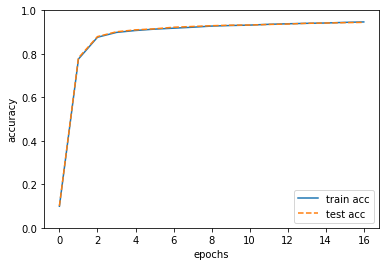

In [26]:
# 그래프 그리기
# 에폭이 진행될수록 정확도가 모두 좋아지고 있다. (두 선이 거의 겹쳐 있다.) → 오버피팅이 일어나지 않았다. 

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#### • 손실 함수의 값 
: 훈련 데이터의 미니배치에 대한 손실 함수의 값


#### • 오버피팅 

: 훈련 데이터에 포함된 이미지만 제대로 구분하고, 그렇지 않은 이미지는 식별할 수 없다. 


#### • 에폭 

: 하나의 단위

: 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수 

## 정리 

### 신경망 학습 
- 손실 함수라는 '지표' 도입 : 가장 먼저 신경망이 학습을 수행할 수 있도록

- 목표 : 손실 함수 기준으로 값이 가장 작아지는 가중치 매개변수 값 찾아내는 것

- 경사법 : 함수의 기울기 이용하는 방법 / 가능한 한 작은 손실 함수의 값 찾는 수법